# Métodos Numericos - Laboratorio 1
Grupo 9

Presentado por:

Juan Diego Rozo Álvarez - Universidad Nacional de Colombia

Daniel Felipe Castro Galindo - Universidad Nacional de Colombia

Juan Pablo Gómez Cristancho - Universidad Nacional de Colombia

---


En este laboratorio se hará uso de métodos numericos, tal como el metodo de la **Biseccion de Bolzano** o **Newton Raphson**, para la solucion de raices de funciones matematicas reales no lineales de manera aproximada.

La implementación de estos metodos será realizada en su totalidad haciendo el uso en Python.

A continuación se explica la estructura del documento en Collab.


*   Definicion de librerias.
*   Definicion de **getTabla** para imprimir los datos almacenados.
*   Definicion del método de la **Bisección de Bolzano y derivados**.
*   Implementacion del **metodo de Bolzano y sus derivados**.
*   Definicion del **método de Newton-Raphson y derivados**.
*   Implementacion del **metodo de NewtonRaphson y derivados**.  









# Definición de librerias

---

Dado a que se va a trabajar con funciones, se requiere la manipulacion de las mismas de forma algebraica con el fin de poder graficarlas posteriormente. Para ello, se hace uso de las librerias de **`SymPy`** y **`Matplotlib`**, respectivamente.

Por otro lado, se cronometrará el tiempo de ejecucion ejecución del código mediante la librería **`time`**.

Por ultimo, dado a que se operará con funciones matematicas, se hará el uso de la libreria de **`numpy`**.

In [ ]:
import sympy as sp
import matplotlib.pyplot as plt
import time
import numpy as np


# Definicion de getTabla

---


`getTabla(args)` es una función de autoria propia del grupo, la cual ayuda a almacenar los datos recopilados de un metodo en formato de un diccionario en Python. La razon por la cual se realiza esta implementacion se debe a dos factores:


1.   **Legibilidad:** Al usar un diccionario, se puede puede representar cada columna de información como una llave con un nombre intuitivo la cual tiene relacionado un valor del tipo Lista, en lugar de usar una lista de listas, lo cual hace que el codigo sea ilegible el código.
2.   **Complejidad algorítmica:** Al ser un diccionario, la búsqueda de una llave es siempre **O(1)**, dada la naturaleza de la estructura Hash.

A continuación, se muestrá el codigo de `getTabla(args)`



In [ ]:
def getTabla(heads_data,setTitle="",character=" "):
    '''

    Genera una tabla en formato de texto a partir de un diccionario de listas.

    Args:
        heads_data (dict): Llaves como encabezados y listas como columnas de datos.
        setTitle (str): Titulo de la tabla (opcional).
        character (str): Caracter de relleno para alinear texto (opcional).

    Returns:
        str: Representacion en string de la tabla formateada.

    Variables:
        table (str): Acumulador de texto para construir la tabla final.
        long_elements_x (dict): Guarda el ancho maximo necesario para cada columna.
        first_head (str): Primera llave del diccionario, usada para conocer el numero de filas.
        long_tabla_y (int): Altura de la tabla (numero de filas).
        long_tabla_x (int): Ancho total de la tabla (sumatoria de anchos de columnas).
        enmarcate (int): Ancho total de la tabla con bordes, usado para formatear y centrar.


    Nota:
        Todas las listas deben tener la misma longitud para evitar errores.


    '''
    table=""
    long_elements_x=dict()
    first_head=next(iter(heads_data))
    long_tabla_y=len(heads_data[first_head])


    if (long_tabla_y==0):
        return "Tabla sin datos"

    if len(character)>1: #si character son varios digitos, agarra el primero
        character=character[:1]

    for head in heads_data:
        # Este for consigue los mayores anchos necesarios para cada columna de la tabla, para mantener un formato
        long_element_x=max(map(str,heads_data[head]),key=len)
        long_head=len(head)
        long_data=len(long_element_x)
        long_elements_x[head]=max(long_head,long_data)

    long_tabla_x=sum(long_elements_x.values())
    enmarcate=long_tabla_x+2*len(heads_data)+len(heads_data)+1
    title=setTitle.center(enmarcate)

    table +="\n"+title+"\n"+"="*enmarcate+"\n"+"|"

    for head in heads_data:
        # Este for carga los encabezados del diccionario a la tabla
        tabulate=long_elements_x[head]
        text_head=str(head).center(tabulate,character)
        table+=" "+text_head+" |"

    table+="\n"+"="*enmarcate+"\n"

    for i in range(long_tabla_y):
        # Este for carga los datos obtenidos a la tabla
        table+="|"
        for head in heads_data:
            tabulate=long_elements_x[head]
            text_data=str(heads_data[head][i]).center(tabulate,character)
            table+=" "+text_data+" |"
        table+="\n"

    table+="="*enmarcate
    return table

# Definicion del Método de la Bisección de Bolzano y derivados


---

Para dar solucion a los ejercicios del taller, se requiere de una funcion la cual permita la implementacion del metodo de Bolzano, la cual va a tener como parametros de entrada la funcion matematica a operar, tambien una variable idependiente y un intervalo [a,b] que pertenece a la función, dada la naturaleza del método. Por otro lado, como vamos a controlar las iteraciones, hacemos uso de un indicador de tolerancia y con el fin de visualizar el formato de los datos presentados definimos el tipo de notacion a utilizar (científica o decimal).

De esta manera, se define la funcion de la siguiente manera:

In [ ]:
def bolzano(str_function,str_variable,a,b,tolerance=0.0001,decimal_notation=False):
    """
    Implementa el metodo de Biseccion (Bolzano) para encontrar una raiz de la funcion f en el intervalo [a, b].

    Args:
        str_function (str): Funcion en formato string.
        str_variable (str): Variable de la funcion.
        a (float): Extremo izquierdo del intervalo.
        b (float): Extremo derecho del intervalo.
        tolerance (float): Tolerancia para detener la iteracion.
        decimal_notation (bool): Si es True, los resultados se formatean en notacion decimal.

    Returns:
        dict: Diccionario con los valores iterativos: k, a_k *root*, c_k, b_k y f(c_k).

    Nota:
        Se asume que f(a) y f(b) tienen signos opuestos.
    """
    results={"k":[],"a_k *root*":[],"c_k":[],"b_k":[],"f(c_k)":[],}

    def fmt(value): # # funcion interna que formatea los datos de results en decimales (opcional)
        return f"{value:.8f}" if decimal_notation else value

    f = process_function(str_function,str_variable)
    k=0

    while k<200:
        c=(a+b)/2 #punto medio
        f_a = f(a)
        f_b = f(b)
        f_c = f(c)

        results["k"].append(k)
        results["a_k *root*"].append(fmt(a))
        results["c_k"].append(fmt(c))
        results["b_k"].append(fmt(b))
        results["f(c_k)"].append(fmt(f_c))

        f_a_c = (f_a>0 and f_c<0) or (f_a<0 and f_c>0) # f(a) y f(c) tienen signos opuestos. Si es cierto, (a,c) --> (a,b)
        f_c_b = (f_b>0 and f_c<0) or (f_b<0 and f_c>0) # f(b) y f(c) tienen signos opuestos. Si es cierto, (a,c) --> (a,b)
        difference=abs(a-b)

        if (difference<=tolerance or f_c==0): # raiz exacta o sobrepaso de tolerancia
            break
        elif f_a_c: #decision de cual lado se recorta el intervalo, dado f(a), f(b) y f(c)
            b=c
        elif f_c_b:
            a=c
        k=k+1
    return results


def process_function(str_function, str_variable):
    """
    Convierte una funcion dada como string a una funcion evaluable en Python.

    Args:
        str_function (str): Expresion de la funcion (por ejemplo, "x**2 - 3").
        str_variable (str): Variable simbolica de la funcion (por ejemplo, "x").

    Returns:
        function: Funcion evaluable en Python usando la libreria math.

    Nota:
        Se usa sympy para convertir la expresion simbolica en una funcion evaluable.
    """
    x=sp.Symbol(str_variable)
    f_simbolic=sp.sympify(str_function)
    f_processed = sp.lambdify(x, f_simbolic, modules=["math"])
    return f_processed

def validate_function(str_func, str_var):
    """
    Valida que una expresion matematica dada como string sea una funcion correcta
    y que la variable usada sea valida.

    Args:
        str_func (str): Expresion de la funcion.
        str_var (str): Variable esperada en la funcion.

    Returns:
        bool: True si la funcion es valida, False en caso contrario.

    Nota:
        Verifica que la variable exista en la expresion y que al evaluarla,
        retorne un valor numerico.
    """
    try:
        f=process_function(str_func,str_var)
        test=isinstance(f(1),(int,float))
        return (str_var in str_func and str_var.isalpha() and test)
    except (TypeError, ValueError):
        return False


def validate_bolzano_interval(str_func,str_var,str_interval):
        """
        Valida si un intervalo [a, b] es adecuado para aplicar el Metodo de Biseccion (Bolzano),
        es decir, si f(a) y f(b) tienen signos opuestos.

        Args:
            str_func (str): Funcion en formato string.
            str_var (str): Variable de la funcion.
            str_interval (str): Intervalo como string separado por espacios, ej. "1 2".

        Returns:
            bool: True si el intervalo es valido, False si no lo es.

        Nota:
            Imprime un mensaje de error si f(a) y f(b) no tienen signos opuestos.
        """
        f=process_function(str_func,str_var)
        interval=str_interval.split()
        a=float(interval[0])
        b=float(interval[1])

        f_a=f(a)
        f_b=f(b)

        if f_a*f_b>0:
            print("\nError: f(a) y f(b) no tienen signos opuestos. \nf(a) = f({}) = {}\nf(b) = f({}) = {}\nVuelva a intentarlo\n".format(a,f_a,b,f_b))
            return False
        else:
            return True




def graficar_bb(str_function, str_variable, a=None, b=None, results={}, points=["a_k *root*","c_k","b_k"]):
    """
    Grafica una funcion junto con las iteraciones del Metodo de Biseccion (Bolzano).

    Args:
        str_function (str): Funcion como string.
        str_variable (str): Variable de la funcion.
        a (float, opcional): Limite inferior del eje x. Si no se da, se calcula automaticamente.
        b (float, opcional): Limite superior del eje x. Si no se da, se calcula automaticamente.
        results (dict): Diccionario de resultados generado por la funcion bolzano().
        points (list): Llaves de los puntos en el diccionario 'results' para graficar las iteraciones.

    Detalles:
        - Grafica f(x) en un rango adecuado.
        - Muestra los puntos de las iteraciones (a_k, c_k, b_k) en el eje x.
        - Resalta la ultima aproximacion con un punto rojo.
        - Añade etiquetas a los primeros y ultimos puntos evaluados.

    Requiere:
        matplotlib, numpy, sympy
    """
    # los nombres de las llaves del diccionario results, deben coincidir con la tabla que arroja el metodo de bolzano, tal como esta formateado en points
    if results:
        a_kroots=results[points[0]]
        c_klist=results[points[1]]
        b_klist=results[points[2]]
    else:
        a_kroots=[]
        c_klist=[]
        b_klist=[]

    x_center=0
    y_margin=1

    # Procesar función
    x = sp.Symbol(str_variable)
    f_sym = sp.sympify(str_function)
    f = sp.lambdify(x, f_sym, modules=["numpy"])

    # Usar última raíz para centrar la gráfica
    if a_kroots:
        x_center = a_kroots[-1]

    # Rango automático si no se especifica a y b
    if a is None or b is None:
        a = x_center - 2
        b = x_center + 2

    x = np.linspace(a, b, 1000)
    y = f(x)

    # Ajuste automático del eje y para mejor visibilidad
    if np.max(y) - np.min(y) != 0:
        y_margin = (np.max(y) - np.min(y)) * 0.1

    y_min = np.min(y) - y_margin
    y_max = np.max(y) + y_margin

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label=f'$f({str_variable}) = {str_function}$')
    plt.axhline(0, color='black', linewidth=0.8)
    plt.axvline(0, color='black', linewidth=0.8)


    if results:
        y_range = np.max([f(a) for a in a_kroots] + [f(b) for b in b_klist] + [f(c) for c in c_klist])
        offset = y_range * 0.05  # Ajuste dinamico del desplazamiento de etiquetas
        # Etiquetar y graficar puntos según el caso
        for i in range(len(a_kroots)):
            f_a=f(a_kroots[i])
            f_c=f(c_klist[i])
            f_b=f(b_klist[i])

            f_a_c = (f_a > 0 and f_c < 0) or (f_a < 0 and f_c > 0)  # f(a) y f(c) tienen signos opuestos
            f_c_b = (f_b > 0 and f_c < 0) or (f_b < 0 and f_c > 0)  # f(b) y f(c) tienen signos opuestos

            if f_a_c:
                plt.scatter(a_kroots[i], 0, color="green", label="Puntos A" if i == 0 else "")  # Etiqueta A
                plt.scatter(c_klist[i], 0, color="blue", label="Puntos B" if i == 0 else "")  # Etiqueta B
                if i==len(a_kroots)-1 or i==0:
                    # Etiqueta con texto para A y C
                    plt.text(a_kroots[i], offset, f"{i}", fontsize=9, ha="center", va="bottom", color="green")
                    plt.text(c_klist[i], offset, f"{i}", fontsize=9, ha="center", va="bottom", color="blue")
            elif f_c_b:
                plt.scatter(c_klist[i], 0, color="green", label="Puntos A" if i == 0 else "")  # Etiqueta C
                plt.scatter(b_klist[i], 0, color="blue", label="Puntos B" if i == 0 else "")  # Etiqueta B

                if i==len(a_kroots)-1 or i==0:
                    # Etiqueta con texto para B y C
                    plt.text(c_klist[i], offset, f"{i}", fontsize=9, ha="center", va="bottom", color="green")
                    plt.text(b_klist[i], offset, f"{i}", fontsize=9, ha="center", va="bottom", color="blue")


        plt.scatter([a_kroots[-1]], [0], color='red', label='Aproximacion final') # ultima raiz
        plt.annotate(f'Raiz ≈ {a_kroots[-1]:.5f}', (a_kroots[-1], 0), textcoords="offset points", xytext=(0,-15), ha='center', color='red') # ultima raiz



    plt.grid(True)
    plt.xlim(a, b)
    plt.ylim(y_min, y_max)
    plt.xlabel(f"${str_variable}$")
    plt.ylabel(f"$f({str_variable})$")
    plt.title("Gráfica de la función y método de Biseccion de Bolzano")
    plt.legend()
    plt.tight_layout()
    plt.show()



Como es posible notar, se han generado y definido al menos tres funciones adicionales, las cuales son:

1. **`process_function`**: Transforma una función en `str` y la convierte en una expresión evaluable.  
2. **`validate_function`**: Verifica que la función esté bien escrita y tenga coherencia.  
3. **`validate_bolzano_interval`**: Valida que el intervalo de la función matemática cumpla con las propiedades del método descrito.

> **Nota:** *Ver la documentación en el código para detalles concretos.*

La razón por la cual estas funciones se separan del método principal `bolzano(args)` es para modularizar al máximo el código general, asegurando que cada función realice una única tarea (principio fundamental en programación).

> **Nota:** *`process_function` y `validate_function` también serán utilizadas en el método de Newton-Raphson, por lo que no será necesario definirlas nuevamente.*

---

Adicionalmente, se construyó una función para graficar exclusivamente las curvas generadas por el método de la **Bisección de Bolzano**. Se dice que es exclusiva porque, si bien **`Plot`** es capaz de graficar cualquier función, este método tiene un comportamiento especial al representar los intervalos [a, b] dados por una lista de resultados.

En otras palabras, la función para graficar tanto la curva como los intervalos seleccionados a partir del método de Bolzano necesitará como parámetros:

- una función matemática en formato texto,  
- una variable dependiente definida por la función,  
- y el diccionario de resultados retornado por `bolzano(args)`,

tal como se muestra en la sección correspondiente del código.



# Construcción del main para el método de la Bisección de Bolzano

---


Ya teniendo definidas las funciones en Python, se puede instanciarse de tal forma que se cumpla un flujo de programa que nos garantice una estructura segura a seguir para efectuar la búsqueda de una raíz de una expresión matemática, dado un intervalo.



In [ ]:
# flujo del programa:
def bolzano_main():
    var=input("Inserte una variable independiente (x,y,z,w... etc)\n(Ejemplo: Variable = x )\nVariable = ")
    func=input(f"Inserte una funcion continua f({var}) en terminos de {var}\n f({var}) = ")

    while not validate_function(func,var):
        print("\nError: La funcion no es valida, intente otra vez:")
        var=input("Variable = ")
        func=input(f"f({var}) = ")

    interval=input("Inserte el intervalo a b en una sola linea\n(Ejemplo: Intervalo = 3 9 )\nIntervalo = ")
    while not validate_bolzano_interval(func,var,interval):
        interval=input("Intervalo = ")

    interval=interval.split()
    a=float(interval[0])
    b=float(interval[1])


    init=time.time()
    result=bolzano(func,var,a,b)
    end=time.time()

    duracion=end-init

    titulo="Biseccion de Bolzano para f({}) = {}".format(var,func)
    tabla=getTabla(result,setTitle=titulo)
    print(tabla)
    print(f"Tiempo de ejecucion: {duracion:.8f}")
    graficar_bb(func,var,a,b,result)



A continuación, se presenta el funcionamiento del metodo bolzano programado en Python, esto mediante la ejecucion de la funcion `bolzano_main()`.

> **Nota:** *es importante poner los datos de entrada en el formato especificado por el programa; de lo contrario, dará error.*

Inserte una variable independiente (x,y,z,w... etc)
(Ejemplo: Variable = x )
Variable = x
Inserte una funcion continua f(x) en terminos de x
 f(x) = x^3+x^2+4
Inserte el intervalo a b en una sola linea
(Ejemplo: Intervalo = 3 9 )
Intervalo = -5 3

Biseccion de Bolzano para f(x) = x^3+x^2+4
| k | a_k *root* | c_k  | b_k  | f(c_k) |
| 0 |    -5.0    | -1.0 | 3.0  |  4.0   |
| 1 |    -5.0    | -3.0 | -1.0 | -14.0  |
| 2 |    -3.0    | -2.0 | -1.0 |  0.0   |
Tiempo de ejecucion: 0.00162864


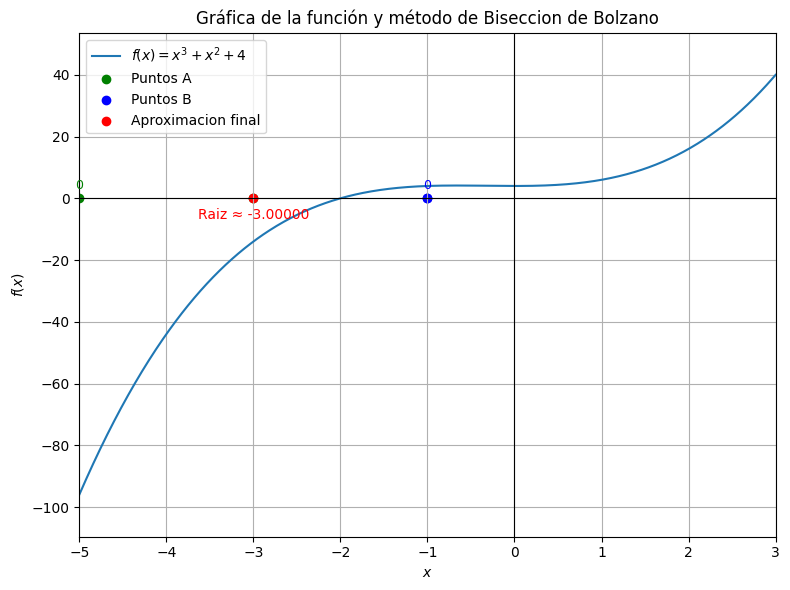

In [ ]:
bolzano_main()

# Definicion del Método de Newton-Raphson y derivados


---

A continuación, se desea utilizar el método de Newton-Raphson. Para ello, es necesario definir una función en Python que permita ejecutar dicho método, dados los parámetros pertinentes para llevar a cabo la tarea.

Nuevamente, se requiere:

- la expresión de la función matemática,  
- la variable independiente sobre la cual está definida,  
- una tolerancia,  
- el tipo de notación con la que se capturan los datos,  
- y un punto inicial `P₀`, dado que la naturaleza del método así lo exige.

La función correspondiente se define de la siguiente manera.


In [ ]:
def newtonRaphson(str_function, variable, point_k0, tolerance=0.0001, decimal_notation=False):
    """
    Implementa el metodo de Newton-Raphson para encontrar raices de funciones continuas.

    Parametros:
        str_function (str): Expresion de la funcion, en formato string (por ejemplo, "x**2 - 2").
        variable (str): Variable simbolica usada en la funcion (por ejemplo, "x").
        point_k0 (float): Punto inicial de la iteracion.
        tolerance (float, optional): Criterio de tolerancia para detener las iteraciones. Default es 0.0001.
        decimal_notation (bool, optional): Si es True, convierte los resultados numericos a notacion decimal (8 decimales). Default es False.

    Returns:
        dict: Diccionario con claves:
            - "k": Numero de iteracion.
            - "P_k *root*": Valor actual de la raiz estimada.
            - "(P_k+1)-(P_k)": Diferencia entre iteraciones.
            - "f(P_k)": Valor de la funcion en el punto actual.

    Nota:
        Se usan funciones simbolicas y derivadas automaticas con SymPy.
        Si la derivada es 0 en algun punto, se detiene el metodo para evitar division por cero.
    """
    results={"k":[],"P_k *root*":[],"(P_k+1)-(P_k)":[],"f(P_k)":[]}

    def fmt(value): # funcion interna que formatea los datos de results en decimales (opcional)
        return f"{value:.8f}" if decimal_notation else value

    x = sp.Symbol(variable)
    # funciones simbolicas
    f_simbolic = sp.sympify(str_function)
    f_diff_simbolic = sp.diff(f_simbolic, x)

    # lambdify vuelve las funciones simbolicas en expresiones evaluables para Python
    f = sp.lambdify(x, f_simbolic, modules=["math"]) # f(x)
    f_diff = sp.lambdify(x, f_diff_simbolic, modules=["math"]) # f´(x)
    k=0

    while True:
        f_pk=f(point_k0) # f(pk)
        f_diff_pk=f_diff(point_k0) # f´(pk)

        if f_diff_pk==0: # evita la division por cero
            break

        point_k1=point_k0-(f_pk/f_diff_pk) # newton-raphson formula
        difference=abs(point_k1-point_k0)

        results["k"].append(k)
        results["P_k *root*"].append(fmt(point_k0))
        results["(P_k+1)-(P_k)"].append(fmt(difference))
        results["f(P_k)"].append(fmt(f_pk))

        point_k0=point_k1 # se actualiza al siguiente punto

        if difference<tolerance:
            break
        k=k+1
    return results

def validate_nR_point0(enter_point):
    """
    Valida que el punto ingresado pueda ser convertido a numero flotante.

    Args:
        enter_point: Valor recibido (str, int, float).

    Returns:
        bool: True si el valor puede ser convertido a float, False si no.
    """
    try:
        return isinstance(float(enter_point),(int,float))
    except ValueError:
        return False


def graficar_nr(str_function, str_variable, a=None, b=None, results={}):
    """
    Grafica una funcion junto con las iteraciones del Metodo de Newton-Raphson.

    Args:
        str_function (str): Funcion como string.
        str_variable (str): Variable de la funcion.
        a (float, opcional): Limite inferior del eje x. Se ajusta automaticamente si no se da.
        b (float, opcional): Limite superior del eje x. Se ajusta automaticamente si no se da.
        results (dict): Diccionario con las aproximaciones por iteracion, generado por el metodo de Newton-Raphson.

    Detalles:
        - Muestra la curva de f(x) y las tangentes usadas en cada iteracion.
        - Representa graficamente los puntos generados durante el proceso.
        - Resalta la ultima aproximacion encontrada.
        - Ajusta automaticamente los ejes para mejorar la visualizacion.

    Requiere:
        matplotlib, numpy, sympy
    """
    xroots=[]
    x_center=0
    y_margin=1
    # Procesar función y derivada
    x=sp.Symbol(str_variable)
    f_sym=sp.sympify(str_function)

    f=sp.lambdify(x, f_sym, modules=["numpy"])
    f_prime=sp.lambdify(x, sp.diff(f_sym, x), modules=["numpy"])

    # Obtener raíces estimadas desde el diccionario
    for head in results:
        if "root" in head:
            xroots=results[head]

    # Usar última raíz para centrar la gráfica
    if xroots:
        x_center=xroots[-1]

    # Rango automático si no se especifica a y b
    if a is None or b is None:
        a = x_center - 2
        b = x_center + 2

    x = np.linspace(a, b, 1000)
    y = f(x)

    # Ajuste automático del eje y para mejor visibilidad
    if np.max(y) - np.min(y) != 0:
        y_margin = (np.max(y) - np.min(y)) * 0.1

    y_min = np.min(y) - y_margin
    y_max = np.max(y) + y_margin

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label=f'$f({str_variable}) = {str_function}$')
    plt.axhline(0, color='black', linewidth=0.8)
    plt.axvline(0, color='black', linewidth=0.8)

    # Graficar las iteraciones de Newton-Raphson
    if results:
        for i in range(len(xroots)-1):
            x_k = float(xroots[i])
            fx_k = f(x_k)
            m = f_prime(x_k)
            if m == 0: continue  # evitar division por cero
            # Recta tangente: y = m*(x - x0) + f(x0)
            xtan = np.linspace(x_k - 100000, x_k + 100000, 10)
            ytan = m * (xtan - x_k) + fx_k
            plt.plot(xtan, ytan, '-', color='gray', linewidth=1) #se une xtan y ytan por medio de una linea, para representar la recta

        if xroots:
            plt.scatter(xroots, [0]*len(xroots), color='red', label='Iteraciones') # puntos estimados
            plt.scatter([xroots[-1]], [0], color='blue', label='Aproximacion final') # ultima raiz
            plt.annotate(f'Raiz ≈ {xroots[-1]:.5f}', (xroots[-1], 0), textcoords="offset points", xytext=(0,10), ha='center', color='blue')

    plt.grid(True)
    plt.xlim(a, b)
    plt.ylim(y_min, y_max)
    plt.xlabel(f"${str_variable}$")
    plt.ylabel(f"$f({str_variable})$")
    plt.title("Gráfica de la función y método de Newton-Raphson")
    plt.legend()
    plt.tight_layout()
    plt.show()

Como se puede observar, este método solo cuenta con una función derivada, denominada **`validate_nR_point0`**, la cual verifica si el punto de entrada es un número válido.

No obstante, el método **`newtonRaphson(args)`** también hace uso de las funciones **`process_function`** y **`validate_function`** más adelante. Sin embargo, como se mencionó anteriormente, no es necesario declararlas nuevamente, ya que estas ya fueron definidas previamente.

---

Adicionalmente, este método numérico cuenta con una función propia para graficar la curva. Se establece una distinción entre **`graficar_nr(args)`** y **`graficar_bb(args)`**, ya que la primera realiza un tratamiento diferente de los puntos graficados en las aproximaciones a la raíz. Esto permite representar visualmente las rectas tangentes que caracterizan al método de Newton-Raphson, tal como se expresa en la sección correspondiente del código.


# Construcción del main para el método Newton-Raphson

---

Nuevamente, se procede a estructurar un flujo de programa que garantice una secuencia segura y ordenada para llevar a cabo la búsqueda de una raíz de una expresión matemática, dado un punto inicial (preferiblemente cercano a la raíz).



In [ ]:
def main_newtonRaphson():
    var=input("Inserte una variable independiente (x,y,z,w... etc)\n(Ejemplo: Variable = x )\nVariable = ")
    func=input(f"Inserte una funcion continua f({var}) en terminos de {var}\n f({var}) = ")

    while not validate_function(func,var):
        print("\nError: La funcion no es valida, intente otra vez:")
        var=input("Variable = ")
        func=input(f"f({var}) = ")

    point=input("Punto inicial\nP = ")
    while not validate_nR_point0(point):
        print(f"\nError: {point} no es válido, intente otra vez:")
        point=input("P = ")

    point=float(point)

    init=time.time()
    result=newtonRaphson(func,var,point,decimal_notation=False)
    end=time.time()

    duration=end-init

    titulo="Newton-Raphson para f({}) = {}".format(var,func)
    tabla=getTabla(result,setTitle=titulo)
    print(tabla)
    print(f"Tiempo de ejecicion:{duration:.8f}")
    graficar_nr(func,var,results=result)

A continuación, se presenta el funcionamiento del metodo NewtonPaphson programado en Python, esto mediante la ejecucion de la funcion `main_newtonRaphson()`.

> **Nota:** *es importante poner los datos de entrada en el formato especificado por el programa; de lo contrario, dará error.*

Inserte una variable independiente
(Ejemplo: x,t,u,v)
Variable = x
Inserte una funcion f(x) en terminos de x
 f(x) = 3*x**4+sin(x**2)
Punto initial
P = 10

                   Newton-Raphson para f(x) = 3*x**4+sin(x**2)                   
| k  |       P_k *root*       |     (P_k+1)-(P_k)      |         f(P_k)         |
| 0  |          10.0          |   2.4963700245559277   |   29999.49363435889    |
| 1  |   7.503629975444072    |   1.8704872579129983   |    9510.33581147511    |
| 2  |   5.633142717531074    |   1.4014353068788434   |   3021.127114188173    |
| 3  |   4.2317074106522305   |   1.0512840522159217   |   961.2104366419871    |
| 4  |   3.180423358436309    |   0.8036665497612732   |   306.3085234268198    |
| 5  |   2.3767568086750357   |   0.5768028347868175   |    95.1401421701624    |
| 6  |   1.7999539738882182   |   0.4727913824732941   |   31.391495329989663   |
| 7  |   1.327162591414924    |  0.37348825325939705   |   10.289070419789992   |
| 8  |   0.9536743381555

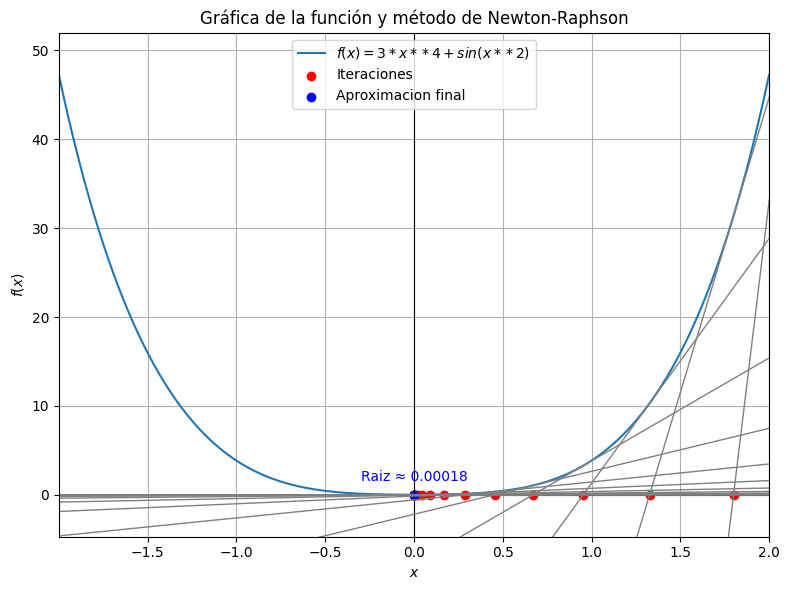

In [ ]:
main_newtonRaphson()